In [4]:
# Name: Brian Dorricott
# Assignment due: 2-Jul-20
#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
# get matplot to show charts inline
%matplotlib inline

In [21]:
# 1. Read data set
#
df = pd.read_csv("..\\data\\Australian-coronavirus-tracking-updates.csv")

In [104]:
print(df[df.index == 10])

   State        Date Time  Cumulative case count  Cumulative deaths  \
10   NSW  30/01/2020  NaN                    4.0                NaN   

   Tests conducted (negative)  Tests conducted (total)  \
10                        NaN                     74.0   

    Hospitalisations (count)  Intensive care (count) Ventilator usage (count)  \
10                       NaN                     NaN                      NaN   

    Recovered (cumulative) Update Source Notes  
10                     NaN    NSW Health   NaN  


In [22]:
# 2. Print summary of data
#
print(df.shape)

(850, 13)


In [23]:
print(df.info)

<bound method DataFrame.info of     State        Date   Time  Cumulative case count  Cumulative deaths  \
0      SA  23/01/2020    NaN                    0.0                NaN   
1     VIC  25/01/2020    NaN                    1.0                NaN   
2     NSW  25/01/2020    NaN                    3.0                NaN   
3     NSW  27/01/2020    NaN                    4.0                NaN   
4     QLD  28/01/2020    NaN                    0.0                NaN   
..    ...         ...    ...                    ...                ...   
845   VIC   1/07/2020  15:00                 2231.0                NaN   
846   NSW   1/07/2020  15:25                 3203.0                NaN   
847    WA   1/07/2020  15:29                  611.0                NaN   
848   ACT   1/07/2020  15:31                  108.0                NaN   
849   QLD   1/07/2020  12:00                 1067.0                NaN   

    Tests conducted (negative)  Tests conducted (total)  \
0                   

In [86]:
# Not part of assignment
#
# Select data we want
df_nsw = df[df.State == "NSW"][["Date", "Cumulative case count", "Cumulative deaths"]]
print(df_nsw)

           Date  Cumulative case count  Cumulative deaths
1    25/01/2020                    1.0                NaN
7    29/01/2020                    2.0                NaN
9    30/01/2020                    3.0                NaN
15    1/02/2020                    4.0                NaN
55    1/03/2020                    9.0                NaN
..          ...                    ...                ...
833  27/06/2020                 1987.0                NaN
836  28/06/2020                 2028.0                NaN
840  29/06/2020                 2099.0                NaN
842  30/06/2020                 2159.0                NaN
845   1/07/2020                 2231.0                NaN

[126 rows x 3 columns]


In [87]:
# Not part of assignment
#
# Convert from Cumulative to Daily and rename columns to reflect change
temp = df_nsw.set_index('Date').diff()
df_nsw_daily = temp.rename(columns={"Cumulative case count":"Cases","Cumulative deaths":"Deaths"})
print(df_nsw_daily)

            Cases  Deaths
Date                     
25/01/2020    NaN     NaN
29/01/2020    1.0     NaN
30/01/2020    1.0     NaN
1/02/2020     1.0     NaN
1/03/2020     5.0     NaN
...           ...     ...
27/06/2020   40.0     NaN
28/06/2020   41.0     NaN
29/06/2020   71.0     NaN
30/06/2020   60.0     NaN
1/07/2020    72.0     NaN

[126 rows x 2 columns]


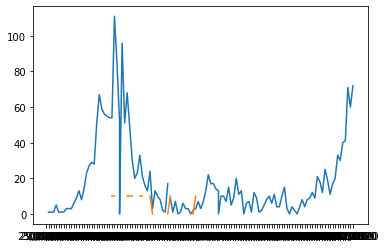

In [88]:
# Not part of assignment
#
# Plot number of cases & deaths (*10 so we can see them)
plt.plot(df_nsw_daily.index, df_nsw_daily["Cases"])
plt.plot(df_nsw_daily.index, df_nsw_daily["Deaths"]*10)
plt.show()


In [89]:
# 3. Exercise results
print(df_nsw_daily.mean())

Cases     18.130081
Deaths     0.631579
dtype: float64


In [90]:
# 4. Use a function to show shape of data
def getshape(df):
    print("Shape of Data Frame: ", df.shape)
getshape(df_nsw_daily)

Shape of Data Frame:  (126, 2)


In [95]:
# 5. Use a function to show mean of data columns
def getmean(df, field):
    print("Mean of", field, "is ", df[field].mean())
getmean(df_nsw_daily, "Cases")
getmean(df_nsw_daily, "Deaths")


Mean of Cases is  18.130081300813007
Mean of Deaths is  0.631578947368421
